# Author: Jaden Armstrong
# Date: 11/03/2023
# Name: Problem1_python.ipynp

In [ ]:
import pandas as pd
from tabulate import tabulate


AdultTrainingDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv");

AdultTrainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K



Data Cleansing
---



In [ ]:
# get some information about the columns in the dataframe
AdultTrainingDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


No null values but they still may be noise in the data

In [ ]:
AdultTrainingDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [ ]:
# Replace zeros with NaN in 'capital-gain' and 'capital-loss' columns
# AdultTrainingDF['capital-gain'].replace(0, pd.NA, inplace=True)
for col in ['capital-gain', 'capital-loss']:
    non_zero_values = AdultTrainingDF[AdultTrainingDF[col] != 0][col]
    mean = non_zero_values.mean()
    AdultTrainingDF[col] = AdultTrainingDF[col].apply(lambda x: mean if x == 0 else x)
AdultTrainingDF['capital-loss'].replace(0, pd.NA, inplace=True)

# Calculate the mean of non-zero values in 'capital-gain' and 'capital-loss'
mean_capital_gain = AdultTrainingDF['capital-gain'].mean()
mean_capital_loss = AdultTrainingDF['capital-loss'].mean()

# Impute NaN values with the respective means
AdultTrainingDF['capital-gain'].fillna(mean_capital_gain, inplace=True)
AdultTrainingDF['capital-loss'].fillna(mean_capital_loss, inplace=True)

AdultTrainingDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,12810.233766,1877.836676
std,13.678875,2.598297,6333.657929,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,12810.233766,1877.836676
50%,37.000000,10.000000,12810.233766,1877.836676
75%,48.000000,12.000000,12810.233766,1877.836676
max,90.000000,16.000000,99999.000000,4356.000000


In [ ]:
for col in ['capital-gain', 'capital-loss']:
    std = AdultTrainingDF[col].std()
    mean = AdultTrainingDF[col].mean()

    # Define the lower threshold as 3 standard deviations below the mean
    lower_threshold = mean + 3 * std

    # Replace values below the lower threshold with the mean
    AdultTrainingDF[col] = AdultTrainingDF[col].apply(lambda x: mean if x > lower_threshold else x)

AdultTrainingDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,12394.057280,1873.571287
std,13.678875,2.598297,2063.724075,55.200277
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,12810.233766,1877.836676
50%,37.000000,10.000000,12810.233766,1877.836676
75%,48.000000,12.000000,12810.233766,1877.836676
max,90.000000,16.000000,27828.000000,2080.000000


In [ ]:
# Calculate the mean and standard deviation of the 'education' column
mean_education = AdultTrainingDF['education'].mean()
std_education = AdultTrainingDF['education'].std()

# Define the lower and upper thresholds as 3 standard deviations from the mean
lower_thresholdED = mean_education - 3 * std_education
upper_thresholdED = mean_education + 3 * std_education

# Impute values below the lower threshold with the mean
AdultTrainingDF.loc[AdultTrainingDF['education'] < lower_thresholdED, 'education'] = mean_education

# Impute values above the upper threshold with the mean
AdultTrainingDF.loc[AdultTrainingDF['education'] > upper_thresholdED, 'education'] = mean_education

In [ ]:

# Count the number of values below the lower threshold
count_below_threshold = len(AdultTrainingDF[AdultTrainingDF['education'] < lower_thresholdED])

print(f"Number of values below 3 std of the mean in 'education': {count_below_threshold}")


Number of values below 3 std of the mean in 'education': 0


This handles all the data cleansing for the non-categorical value fields.  Because of errors when using the original name of marital status, 'marital-status' I am renaming the column name to avoid this issue

In [ ]:
# Rename the 'marital-status' column to 'maritalstatus'
AdultTrainingDF.rename(columns={'marital-status': 'maritalstatus'}, inplace=True)

# 'marital-status' column is now renamed to 'maritalstatus'

In [ ]:
# Cross tabulation of Sex and marital-status

p_crosstab = pd.crosstab(AdultTrainingDF.sex, AdultTrainingDF.maritalstatus	)

print(p_crosstab)

maritalstatus  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                              
Female             1219                  7                 761   
Male                795                  4                6010   

maritalstatus  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                      
Female                            95           2160        290      380  
Male                             104           2717        182       73  


In [ ]:
# Cross tabulation of Sex and Workclass
p_crosstab = pd.crosstab(AdultTrainingDF.sex, AdultTrainingDF.workclass)

print(p_crosstab)


workclass    ?  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
sex                                                                           
Female     377          149        377             1     3574            54   
Male       452          305        592             4     6707           444   

workclass  Self-emp-not-inc  State-gov  Without-pay  
sex                                                  
Female                  178        201            1  
Male                    992        385            4  


Create a new Data Frame from AdultTrainingDF with Adults over age 40

In [ ]:
adults_over_40 = AdultTrainingDF[AdultTrainingDF['age'] >= 40]

adults_over_40

,age,workclass,education,maritalstatus,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Male,12810.233766,1877.836676,<=50K
2,49,Private,5.0,Married-spouse-absent,Other-service,Female,12810.233766,1877.836676,<=50K
3,52,Self-emp-not-inc,9.0,Married-civ-spouse,Exec-managerial,Male,12810.233766,1877.836676,>50K
5,40,Private,11.0,Married-civ-spouse,Craft-repair,Male,12810.233766,1877.836676,>50K
7,43,Private,7.0,Married-civ-spouse,Transport-moving,Male,12810.233766,2042.000000,<=50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12.0,Divorced,Prof-specialty,Female,12810.233766,1877.836676,<=50K
14790,65,Self-emp-not-inc,15.0,Never-married,Prof-specialty,Male,1086.000000,1877.836676,<=50K
14791,43,State-gov,10.0,Divorced,Adm-clerical,Female,12810.233766,1877.836676,<=50K
14792,43,Self-emp-not-inc,10.0,Married-civ-spouse,Craft-repair,Male,12810.233766,1877.836676,<=50K


Recreate the contingency table of sex and martial status for adults_over_40 (CHANGE TO MARITAL STATUS). Marital-status is already changed to maritalstatus since it was copied so it does not need to be done again

In [ ]:
# Cross tabulation of Sex and Workclass with adults_over_40
p_crosstab = pd.crosstab(adults_over_40.sex, adults_over_40.maritalstatus)

print(p_crosstab)

maritalstatus  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                              
Female              769                  0                 332   
Male                476                  1                3554   

maritalstatus  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                      
Female                            41            290        147      356  
Male                              50            342         81       71  


Plot the crosstab of sex and marital status

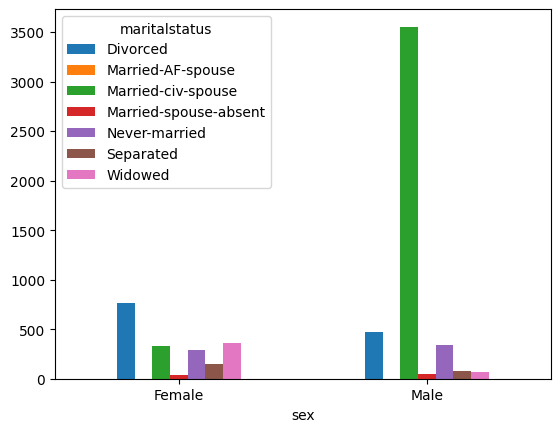

In [ ]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)

Determine weather any outliers exist for the education field

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

adults_over_40 .to_numpy()

array([[50, 'Self-emp-not-inc', 13.0, ..., 12810.233766233767,
        1877.836676217765, '<=50K'],
       [49, 'Private', 5.0, ..., 12810.233766233767, 1877.836676217765,
        '<=50K'],
       [52, 'Self-emp-not-inc', 9.0, ..., 12810.233766233767,
        1877.836676217765, '>50K'],
       ...,
       [43, 'State-gov', 10.0, ..., 12810.233766233767,
        1877.836676217765, '<=50K'],
       [43, 'Self-emp-not-inc', 10.0, ..., 12810.233766233767,
        1877.836676217765, '<=50K'],
       [58, 'Private', 9.0, ..., 12810.233766233767, 1877.836676217765,
        '<=50K']], dtype=object)

In [ ]:
adults_over_40.describe()

,age,education,capital-gain,capital-loss
count,6510.000000,6510.000000,6510.000000,6510.000000
mean,51.396467,10.264784,12334.167576,1873.698781
std,9.230575,2.733880,2309.275656,61.427755
min,40.000000,3.000000,594.000000,323.000000
25%,44.000000,9.000000,12810.233766,1877.836676
50%,49.000000,10.000000,12810.233766,1877.836676
75%,57.000000,13.000000,12810.233766,1877.836676
max,90.000000,16.000000,27828.000000,2080.000000


Looking at these results given by 'describe()' and using manual calculation of the 'minimum' (18.779877 = mean + std*3) and 'maximum' (1.574961 = mean - std*3), it can be seen that the current maximum value for education is within the desired range but there do exist outliers on the lower side of the range.

---


Standardize the age variable, and identify how many outliers there are. What is the most extreme outlier?


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

# 2. Standardize the 'age' variable
AdultTrainingDF['age_standardized'] = scaler.fit_transform(AdultTrainingDF[['age']])

# 3. Identify outliers using a threshold of 3 standard deviations
mean_age = AdultTrainingDF['age_standardized'].mean()
std_age = AdultTrainingDF['age_standardized'].std()

In [ ]:
# Define a threshold for outliers (e.g., 3 standard deviations from the mean)
outliers = AdultTrainingDF[
    (AdultTrainingDF['age_standardized'] > mean_age + 3 * std_age) |
    (AdultTrainingDF['age_standardized'] < mean_age - 3 * std_age)
]

num_outliers = len(outliers)

print(f"Number of outliers: {num_outliers}")

Number of outliers: 60


Identify the most extreme outlier

In [ ]:
most_extreme_outlier = AdultTrainingDF.loc[AdultTrainingDF['age_standardized'].abs().idxmax()]

# The 'most_extreme_outlier' DataFrame now contains the row with the most extreme outlier in terms of standardized 'age'.

print(f"Most Extreme Outlier: {most_extreme_outlier}")

Most Extreme Outlier: age                            90
workclass                 Private
education                     9.0
maritalstatus       Never-married
occupation          Other-service
sex                          Male
capital-gain         12810.233766
capital-loss          1877.836676
income                      <=50K
age_standardized         3.751354
Name: 99, dtype: object


Look for an age anomaly, select only records with age at least 80, and construct a histogram of age. Explain findings

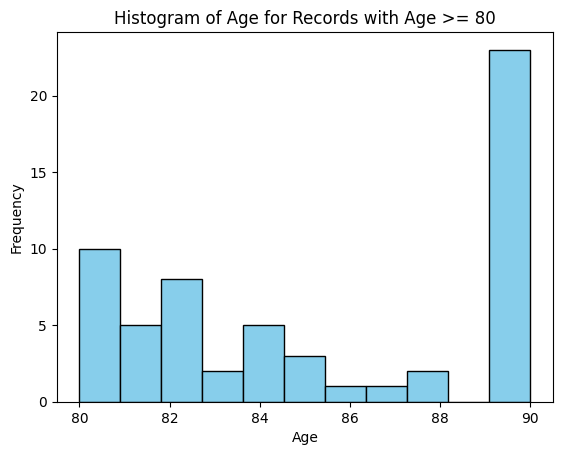

In [ ]:
# 1. Select records with age at least 80
age_anomaly = AdultTrainingDF[AdultTrainingDF['age'] >= 80]

# 2. Create a histogram of age
plt.hist(age_anomaly['age'], bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Records with Age >= 80')
plt.show()

There seems to be a general decline in frequency of individuals over 80 as each year in age increases, other than age 90. In addition, there seems to be no records of individuals 89 years old.

---

In conclusion, it is important to standardize the numeric values as it makes it much easier to identify outliers. Although for certain values, like age, when trying to plot the records of individuals above a specific age, it is easier to use the unchanged age value. For education, no outliers existed in the dataframe for individuals above 40. This was discovered with a manual calculation and did not need a query. Lastly, as previously mentioned, there were no records of individuals aged 89 while a abnormaly high frequency of individuals aged 90.
